In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
customer_df1 = customer_df.copy()

In [7]:
cols1 = [customer_df.columns[i].upper().replace(' ', '_') for i in range(len(customer_df1.columns)) ]
customer_df1.columns = cols1

In [8]:
print(customer_df1.columns)

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')


In [9]:
customer_df1['EFFECTIVE_TO_DATE']= pd.to_datetime(customer_df1['EFFECTIVE_TO_DATE'])

In [10]:
customer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE_TO_DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION_CODE                  9134 non-null   object        
 11  MARITAL_STATUS   

In [11]:
customer_df1

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


C:\Users\Dmitr\AppData\Local\Temp\ipykernel_1196\1966106915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customer_df1.corr(method='pearson')


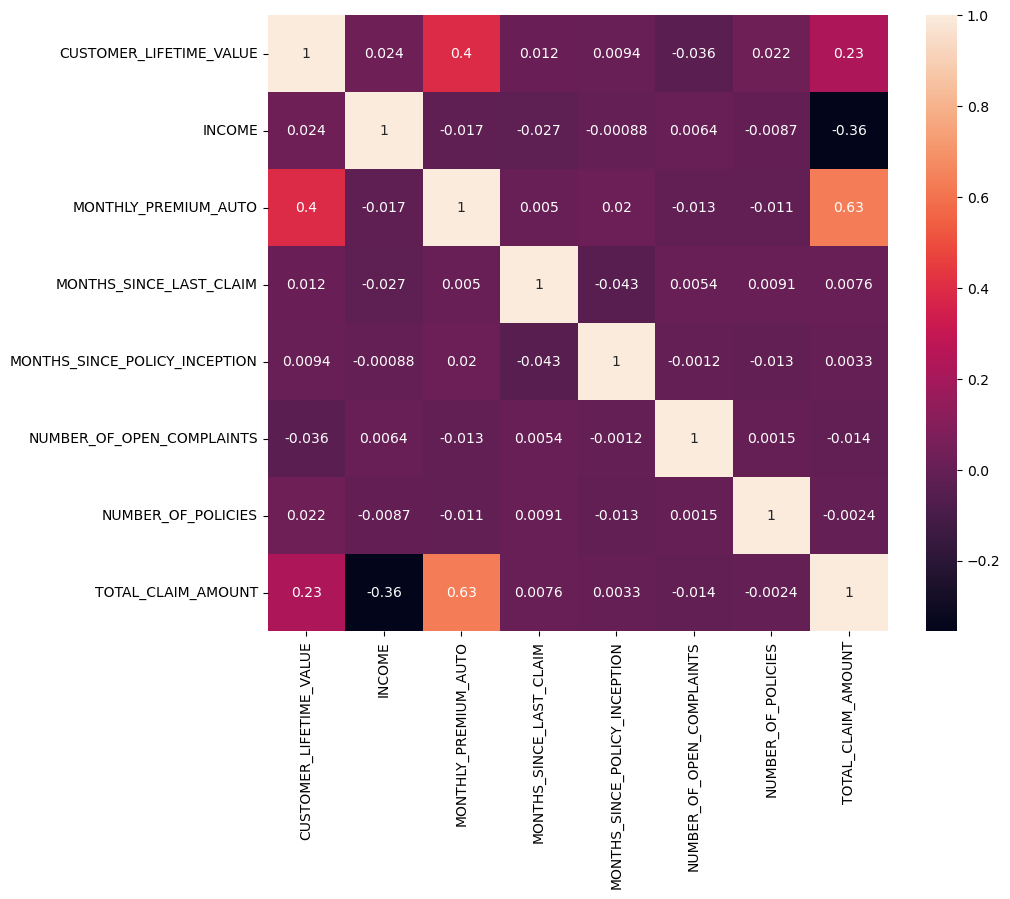

In [12]:
corr_matrix = customer_df1.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

1. The strongest correlation is between "total claim amount" and "monthly premium auto". This totaly makes sense as usually the higher your monthly insurance payment - the more insurance covers. 
2. Second strongest correlation is between customer lifetime value and monthly premium auto.
3. Almost the same strong but negative correlation is between income and total claim amount. Probably there are some policy for lower income customers.
4. There are no multi-colinearity in the matrix.

In [13]:
customer_df1_numerical = customer_df1.select_dtypes("number") # separating numerical from categorical values
customer_df1_categorical = customer_df1.select_dtypes("object")
customer_df1_categorical = customer_df1_categorical.drop(['CUSTOMER'], axis = 1) # dropping the ID column, not going to use it for alanysis

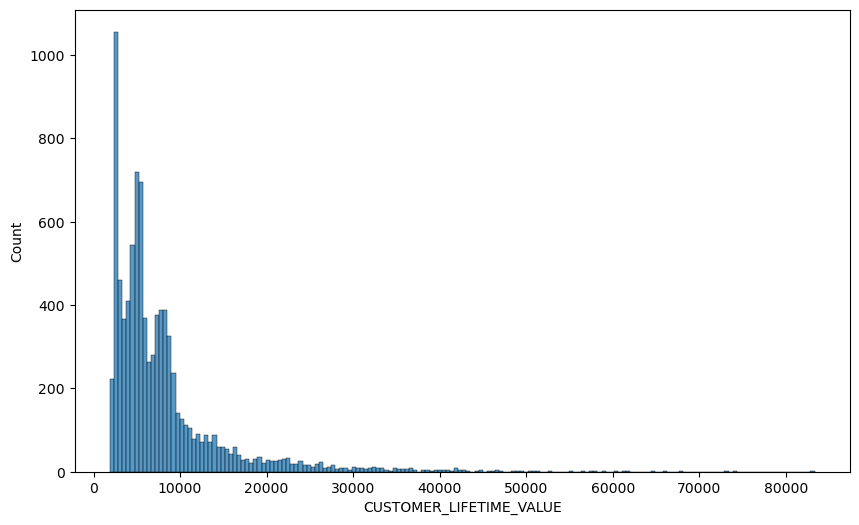

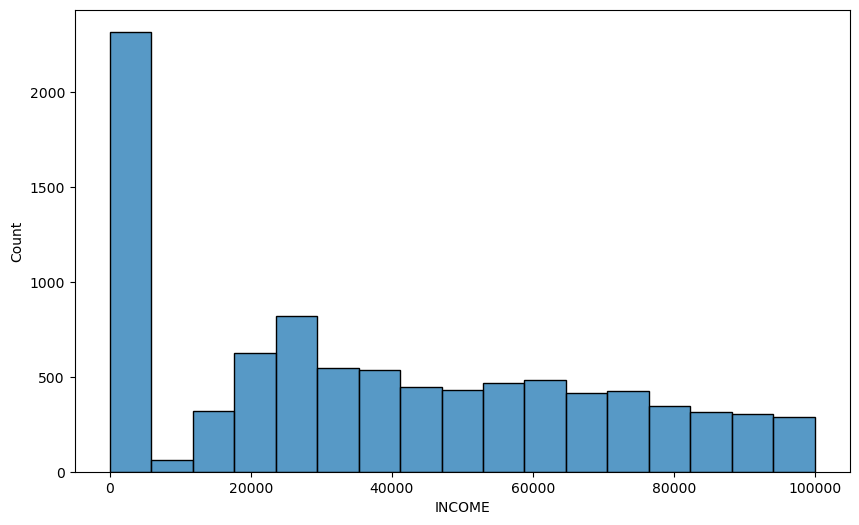

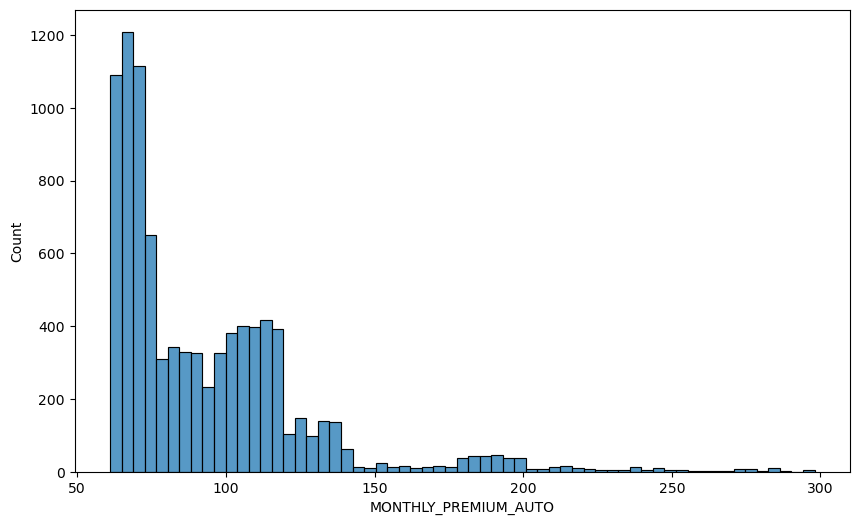

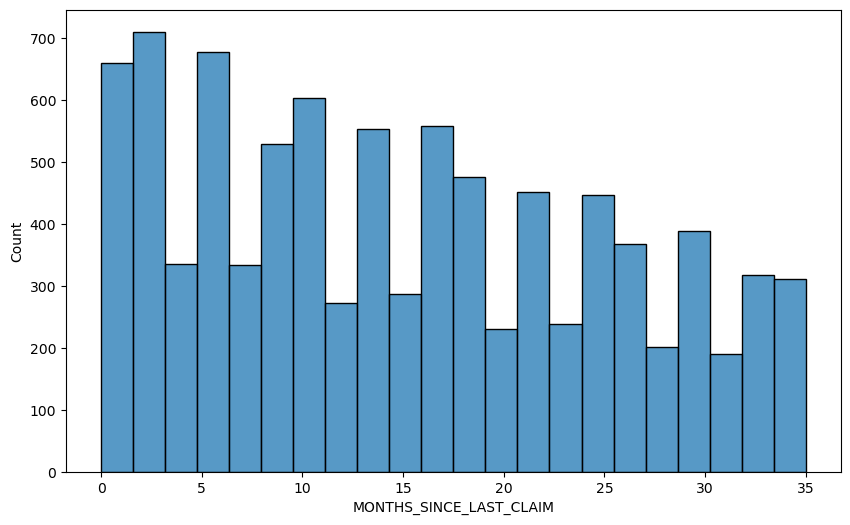

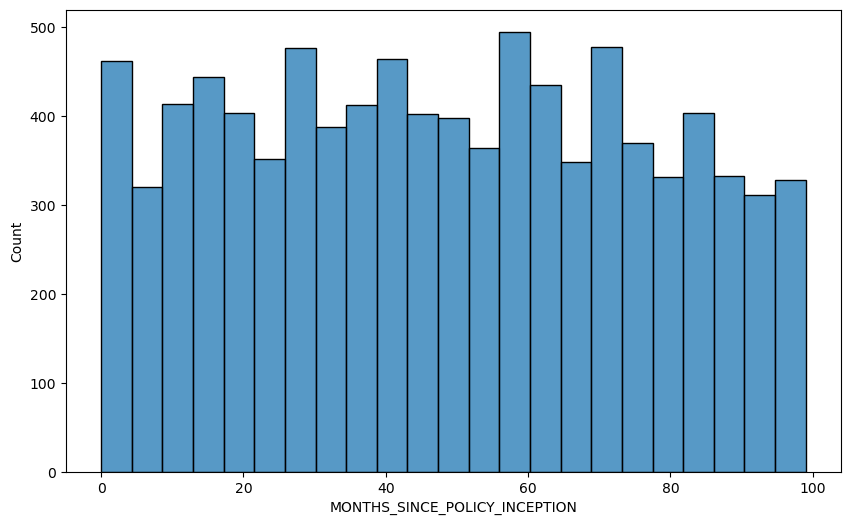

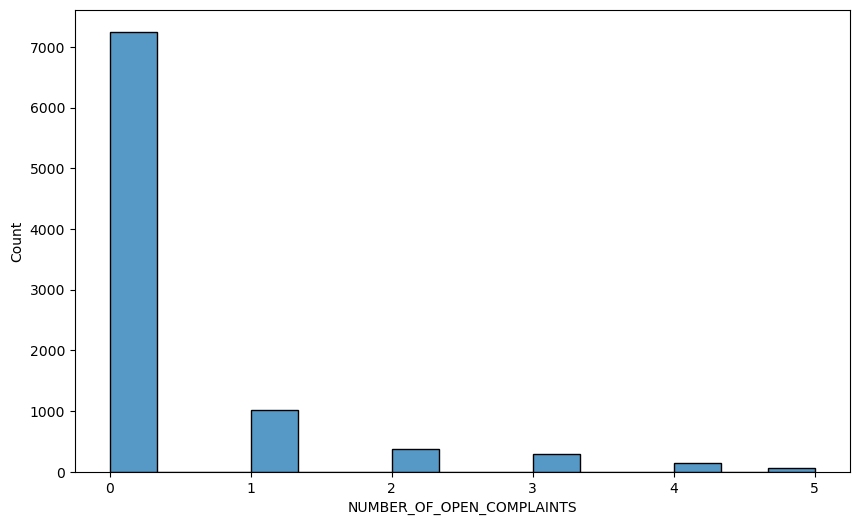

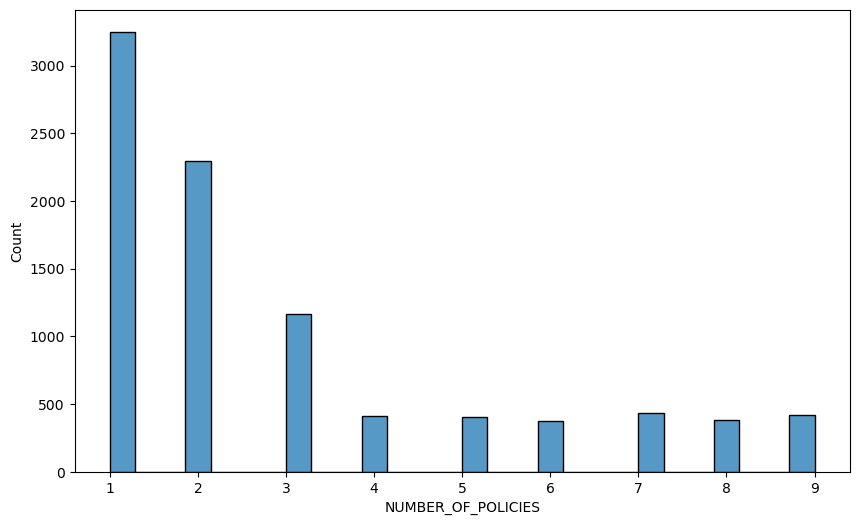

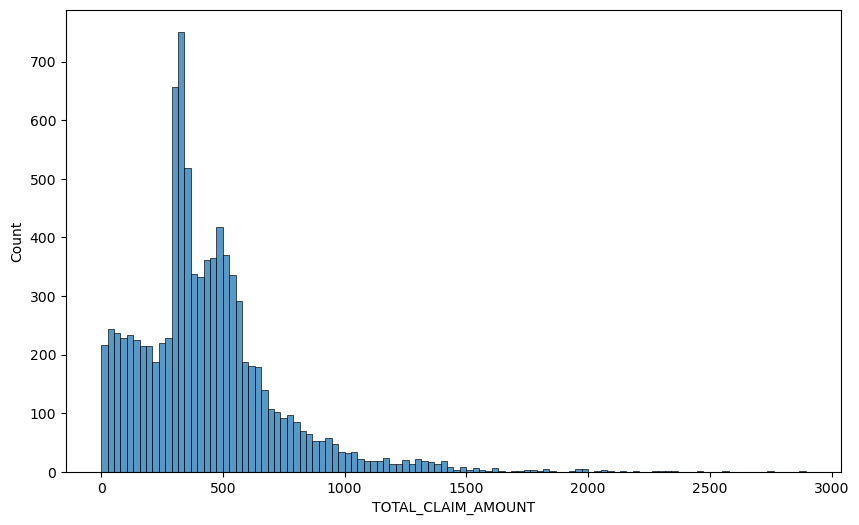

In [14]:
for col in customer_df1_numerical:
    plt.figure(figsize = (10,6))
    sns.histplot(customer_df1_numerical[col])

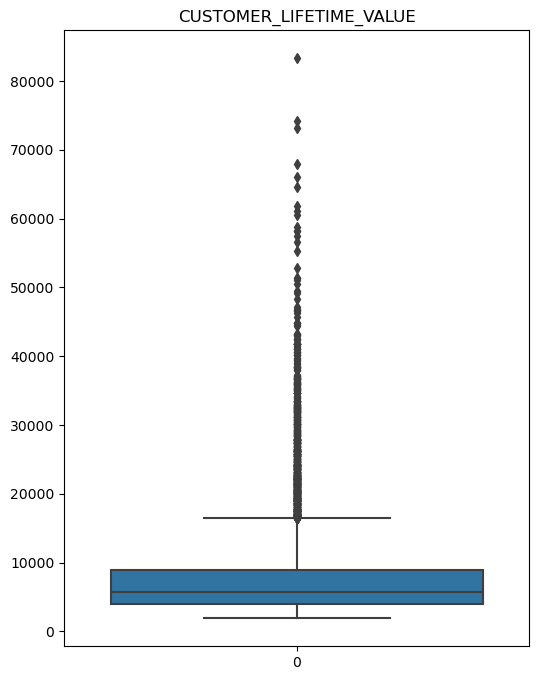

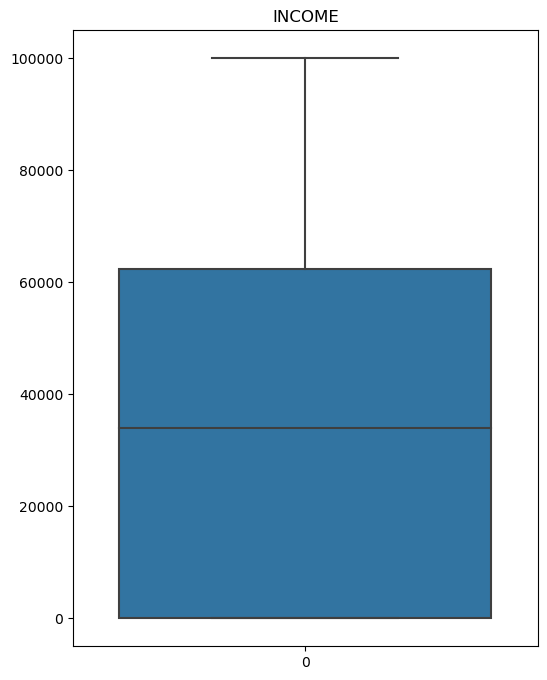

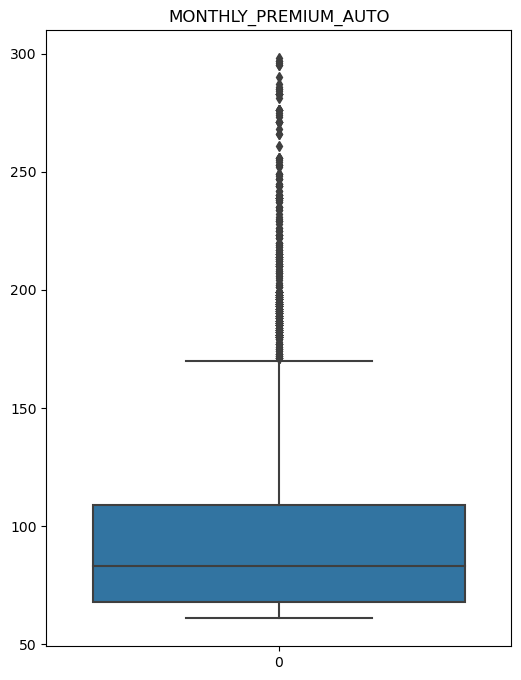

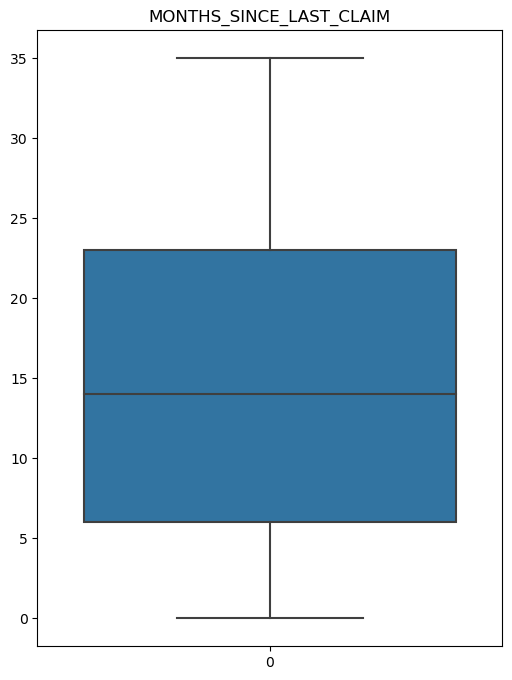

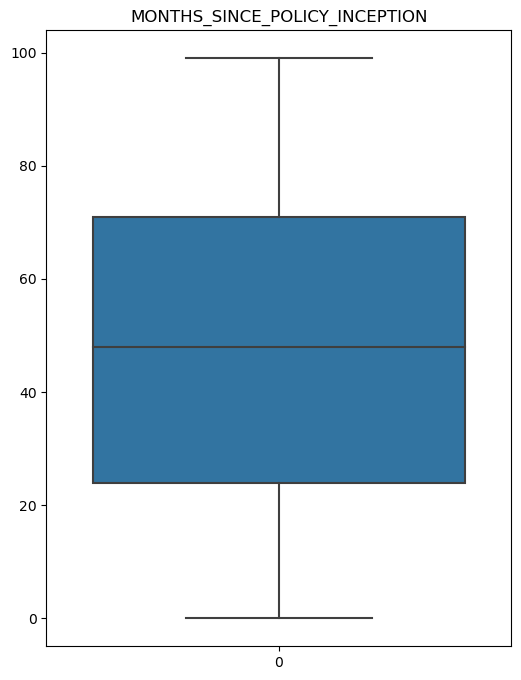

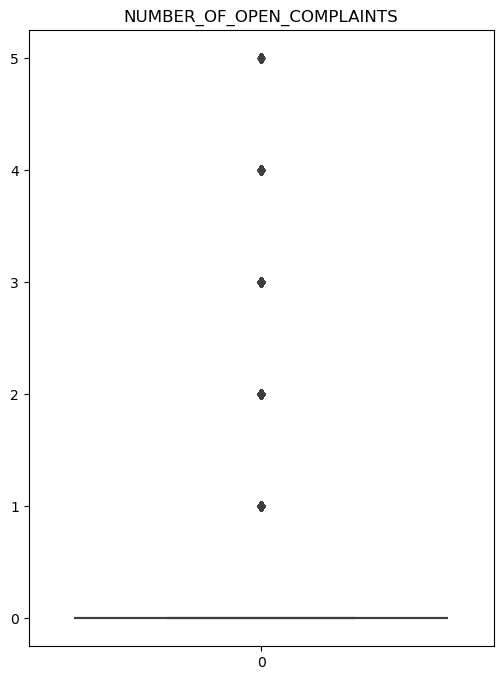

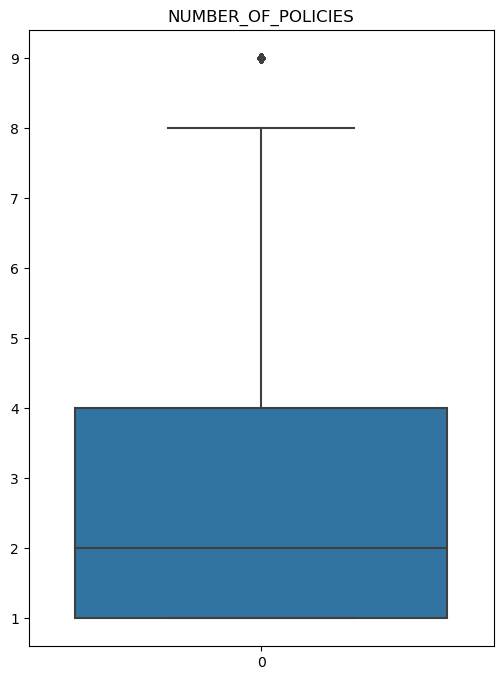

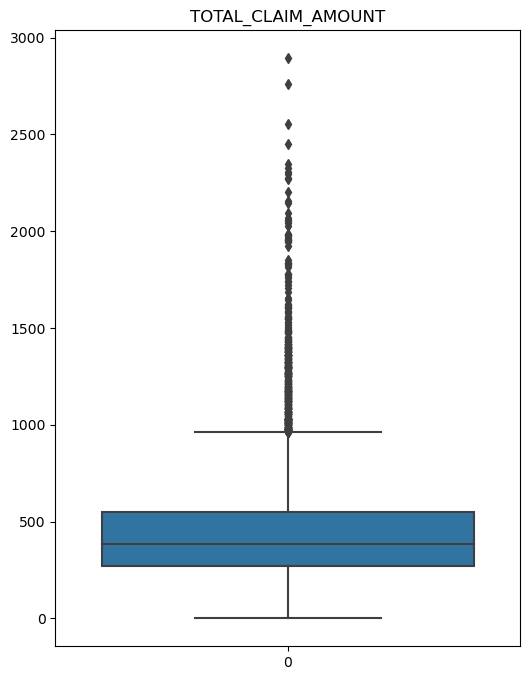

In [15]:
for col in customer_df1_numerical:
    plt.figure(figsize = (6,8))
    plt.title(col)
    sns.boxplot(customer_df1_numerical[col])

- What I can see from the plots is that non of tham is normaly distributed, most of them have a long skew and some outliers that will probably have to be dropped later.
- All of them tend to have mode in lower values. I would guess that this is related to income and monthly premium.
- Number of open complaints is dominated by "0" which is good for insurance company.

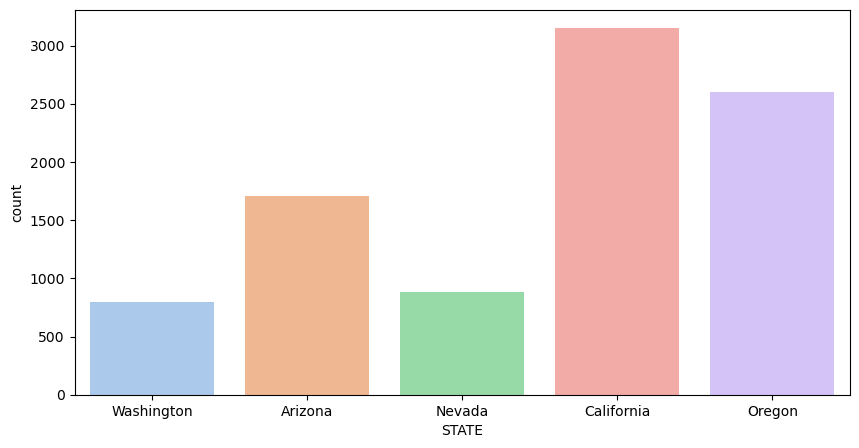

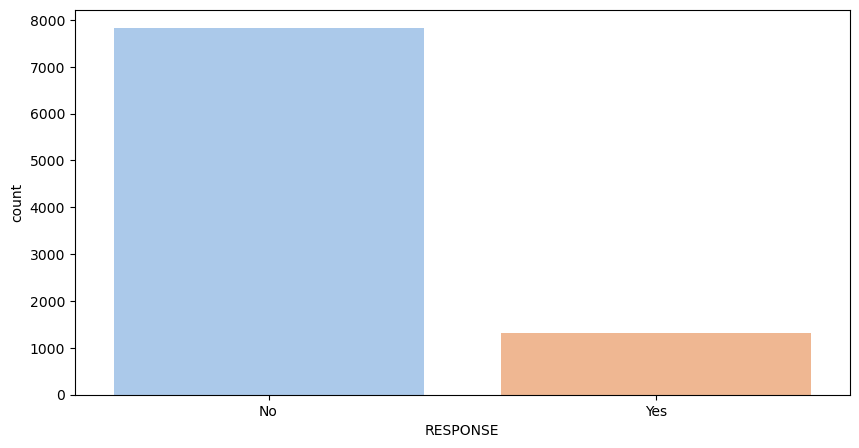

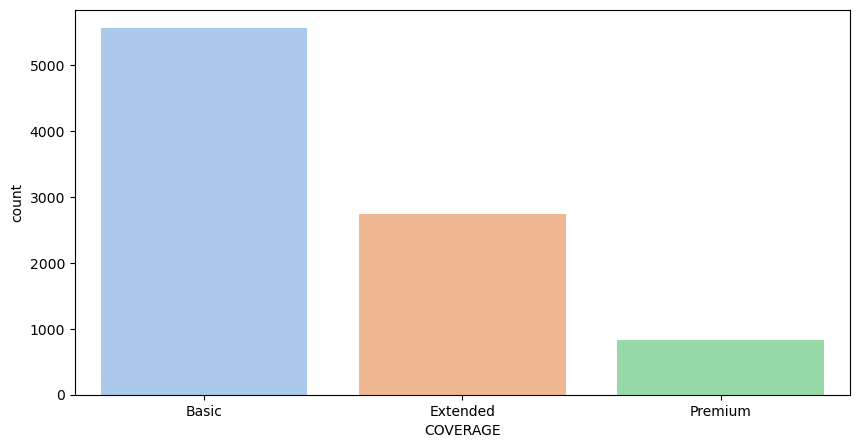

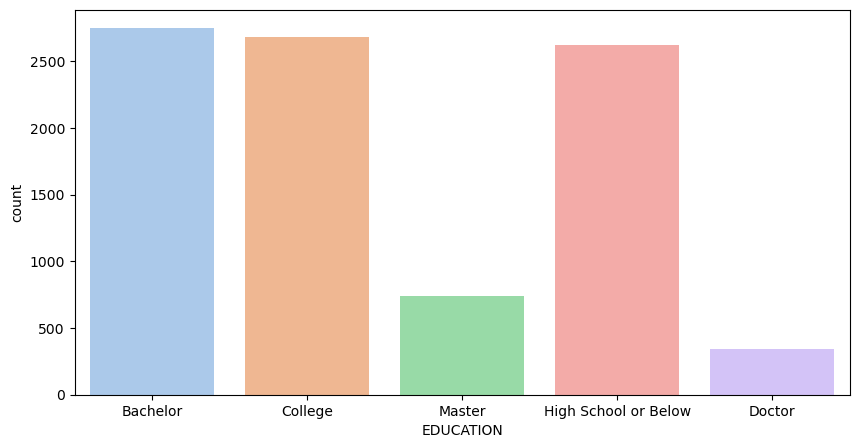

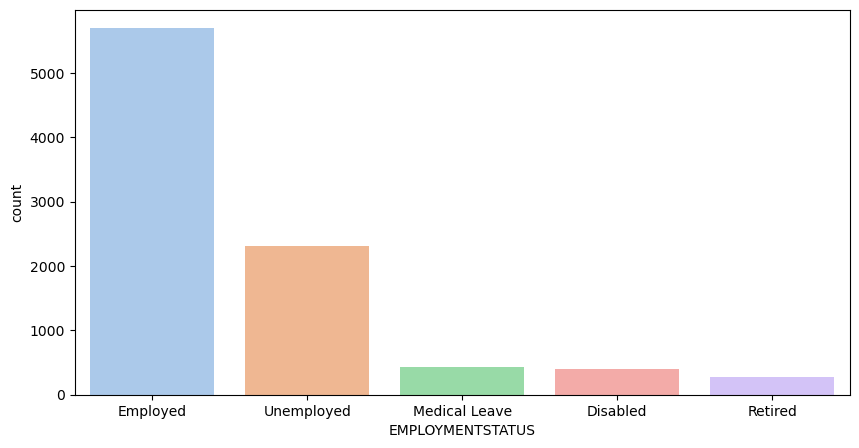

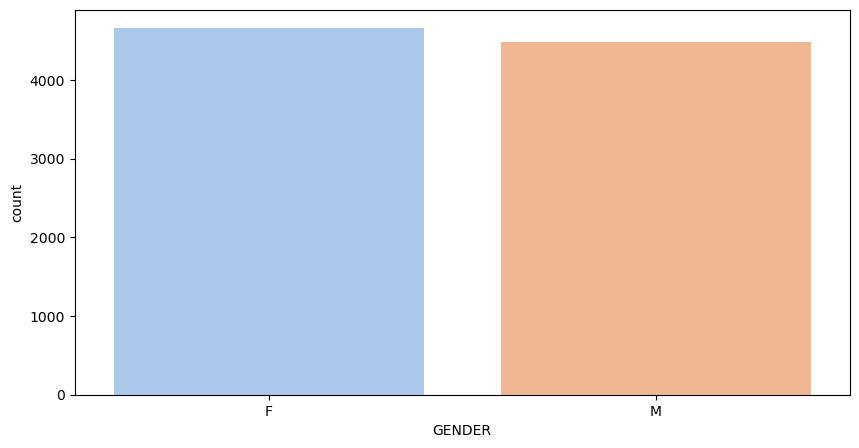

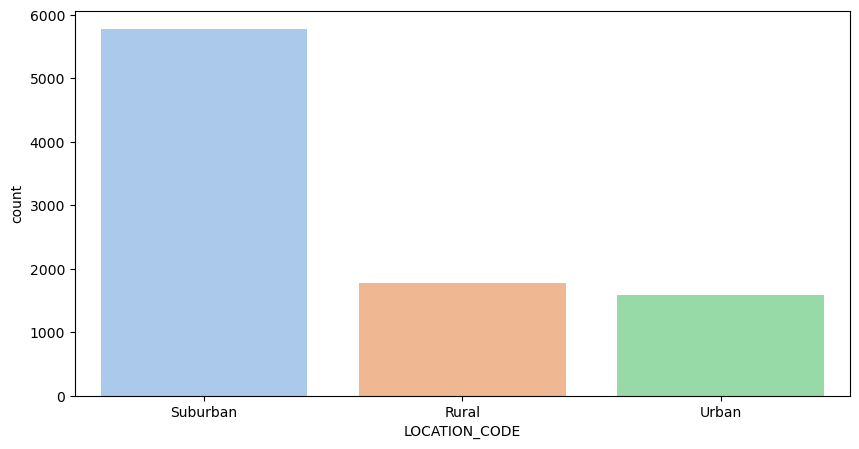

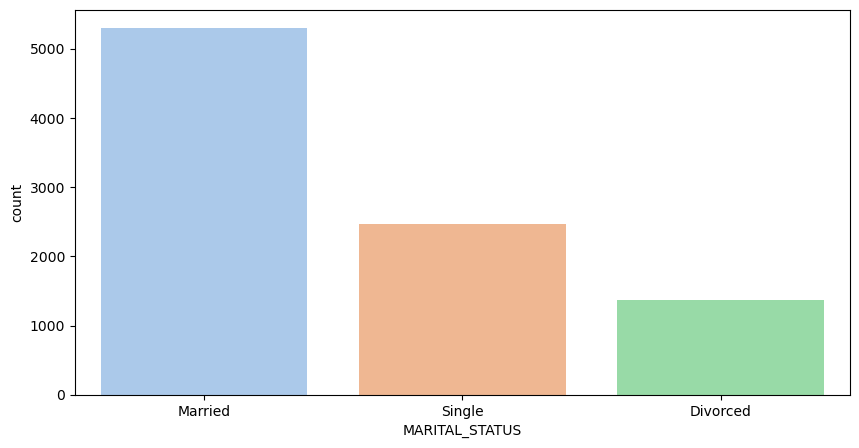

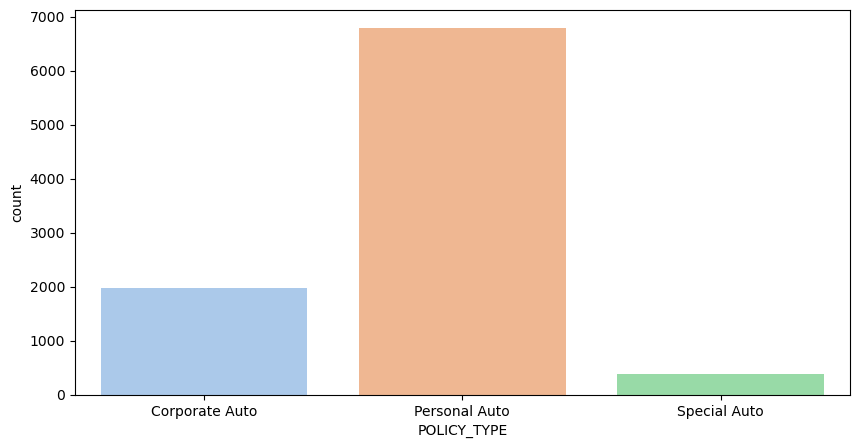

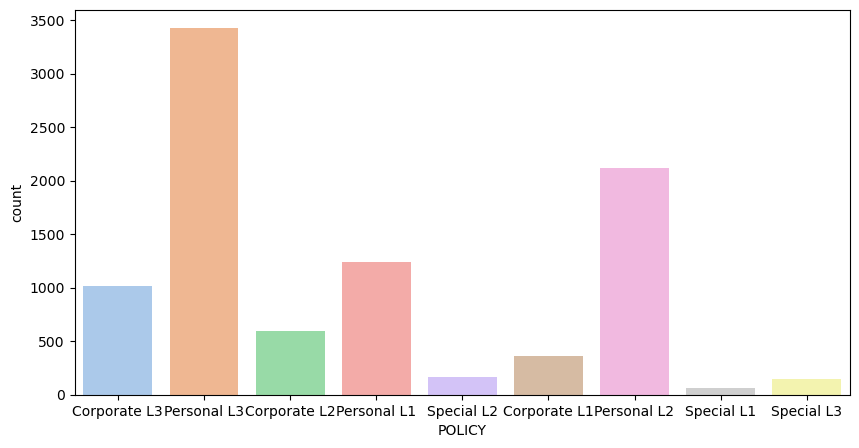

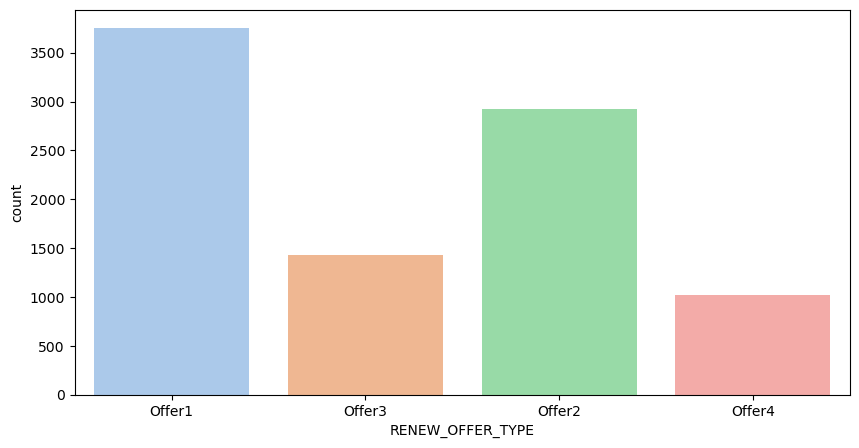

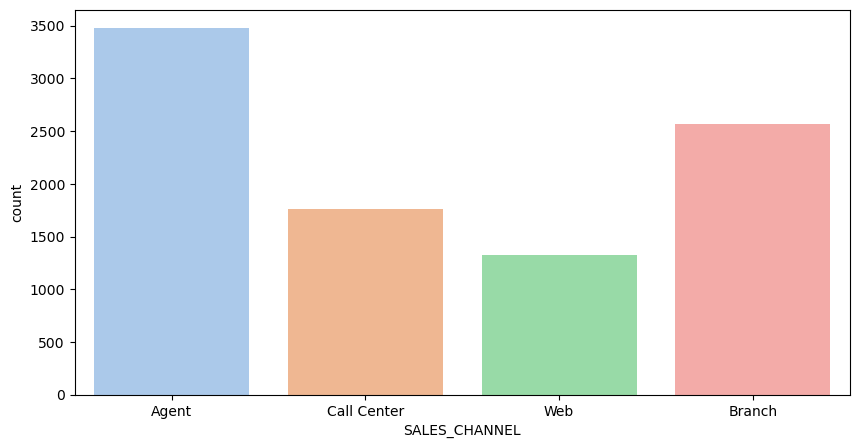

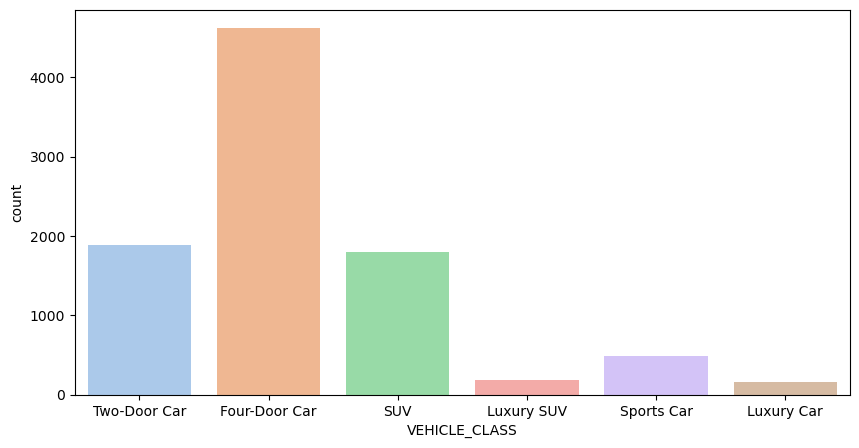

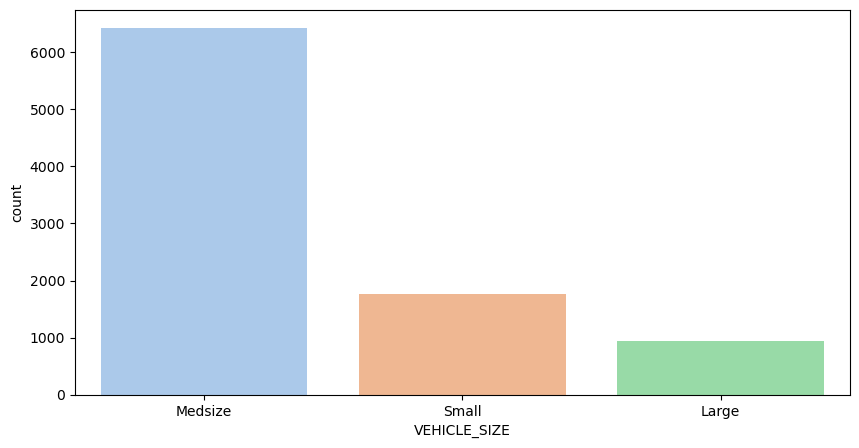

In [16]:
for col in customer_df1_categorical:
    plt.figure(figsize = (10,5))
    sns.countplot(x = col, palette = 'pastel', data = customer_df1_categorical)

#### *All the customers are from west coast, most of them from CA and OR, the sample represents M and F genders equaly, most customers have insurance for their personal car, it is usually medsize, four-door vehicle.*
#### *Also, the sample has inbalance in 'Response' category, where for the most of the customers response is 'No'.*

#### *Seems that we have no NaN's or ' ' (empty values) in the data sample.*

## lab cleaning categorical

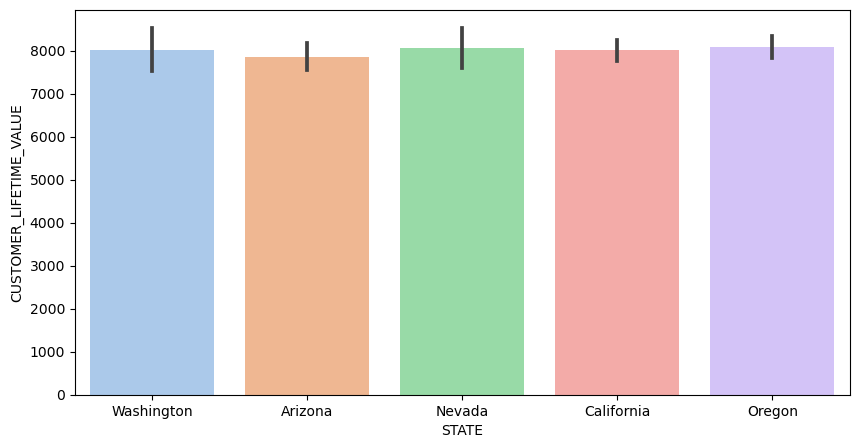

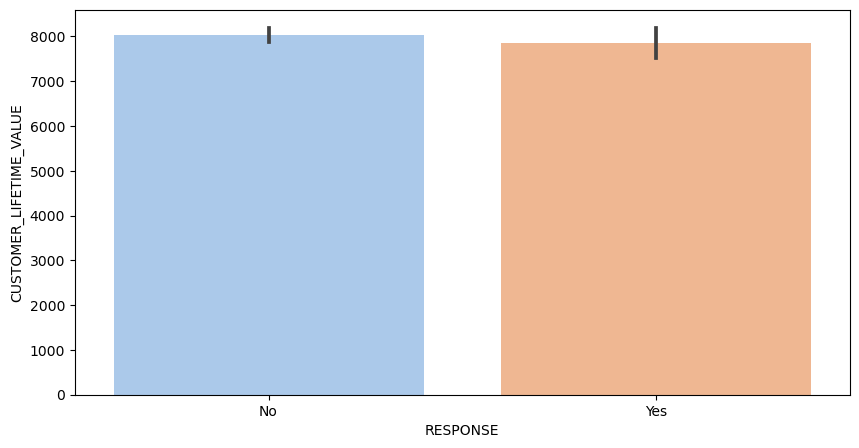

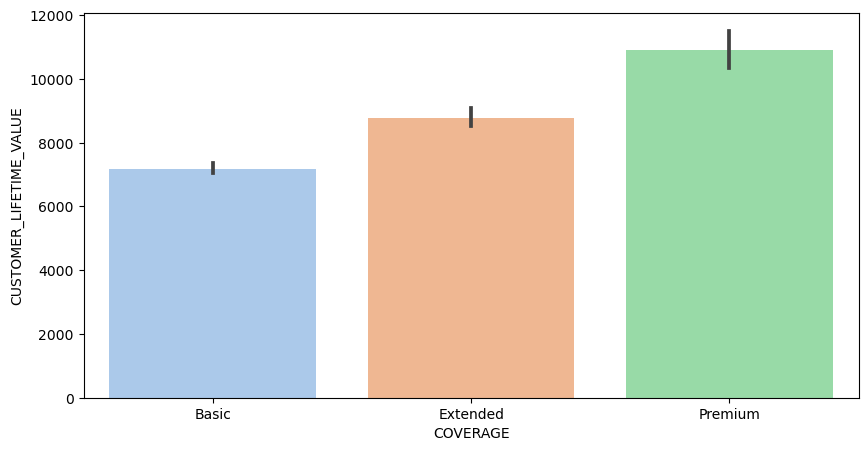

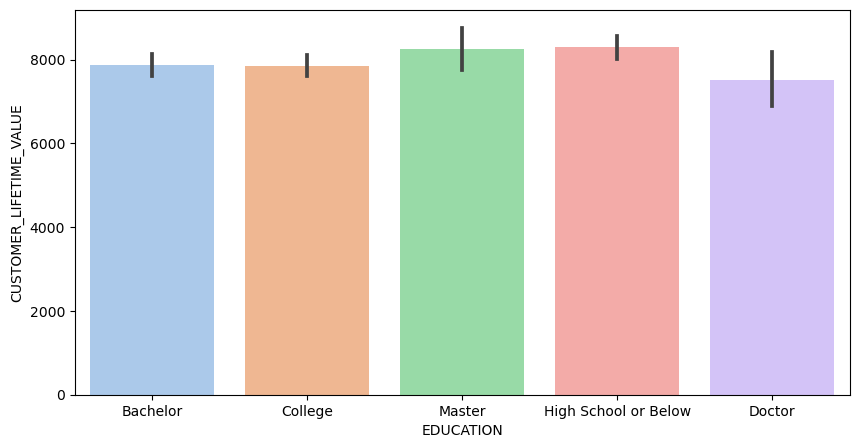

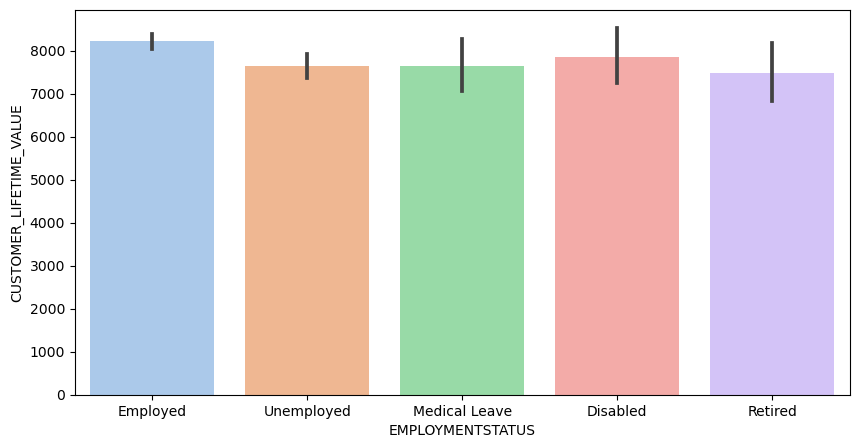

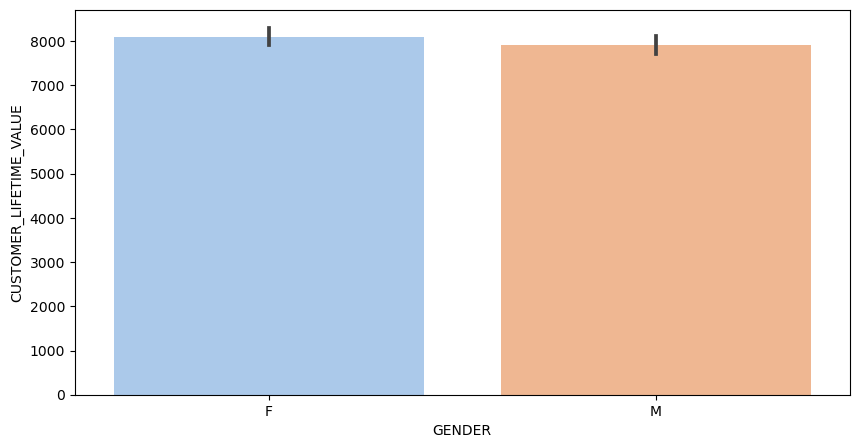

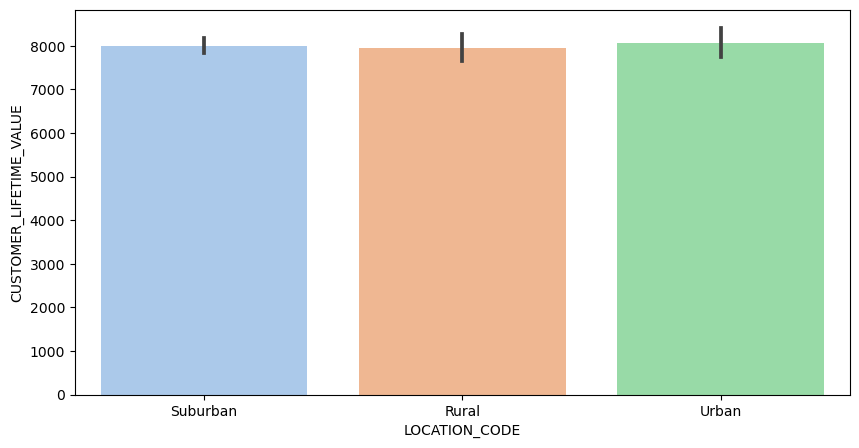

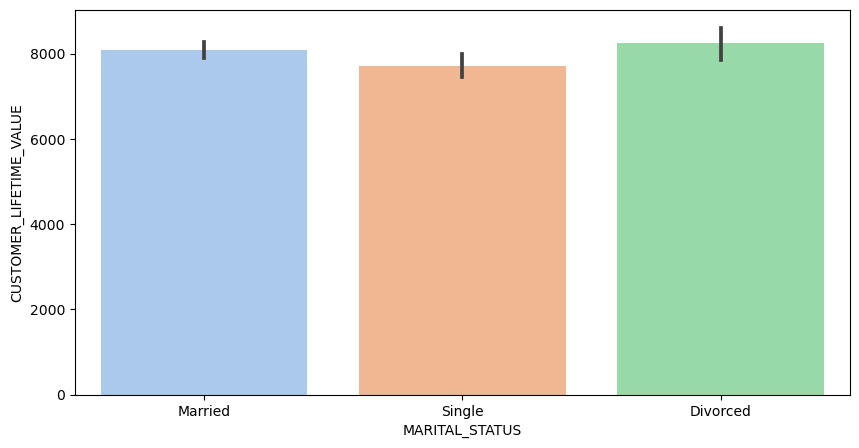

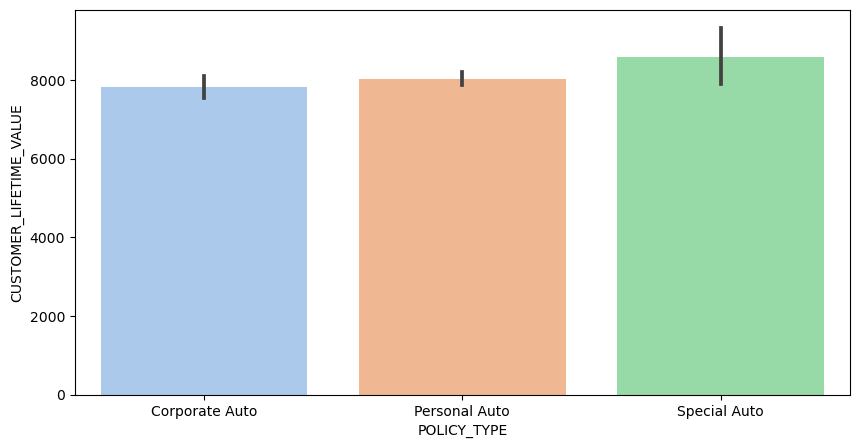

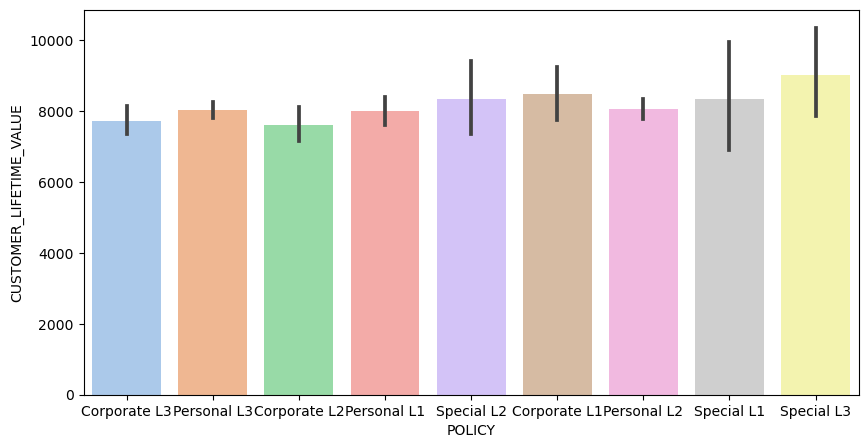

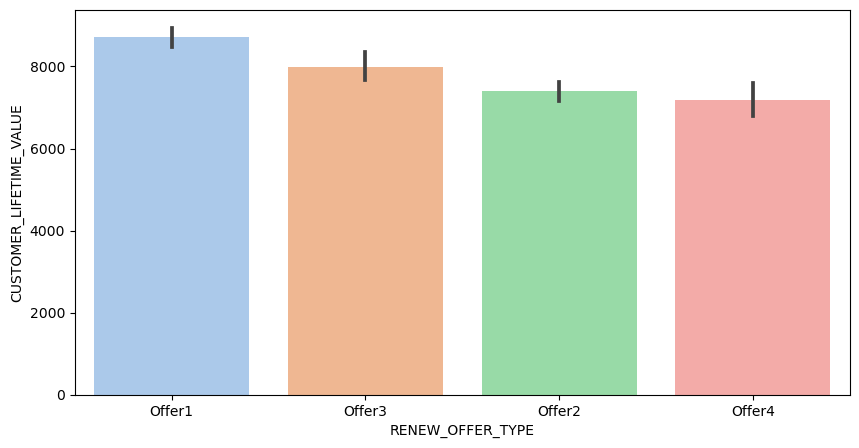

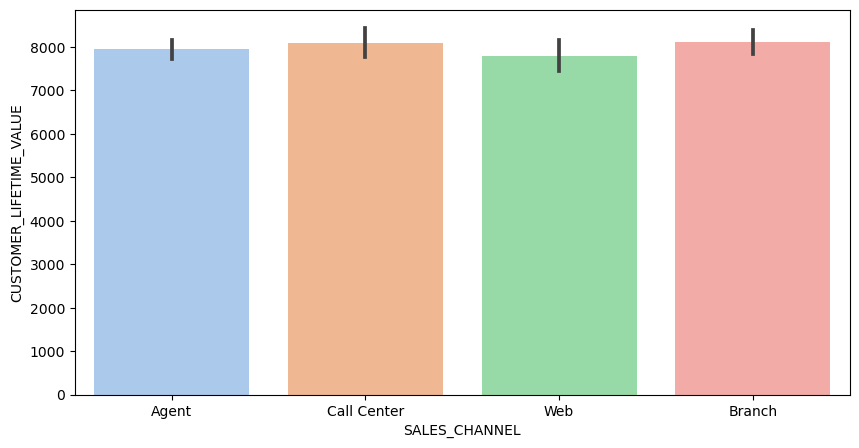

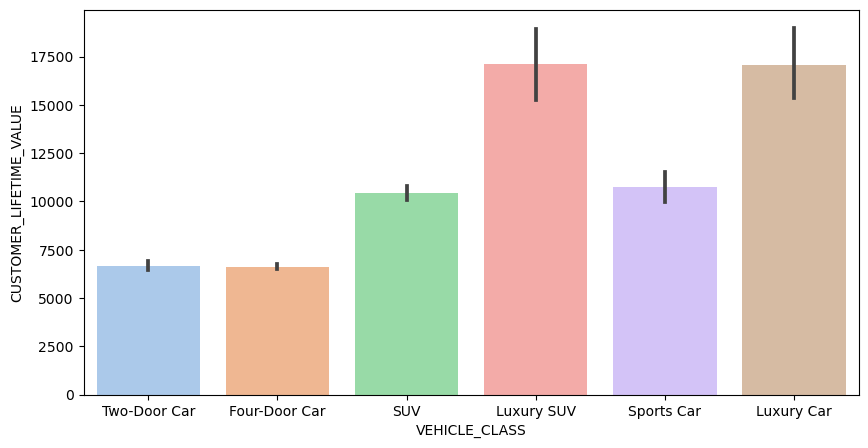

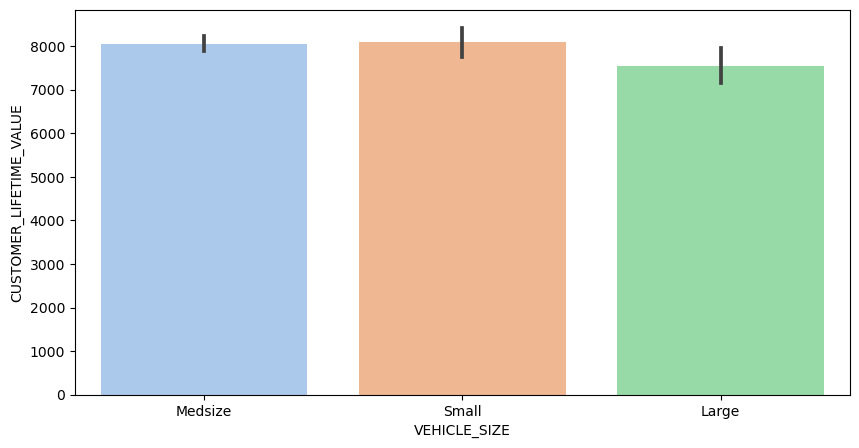

In [17]:
for col in customer_df1_categorical:
    plt.figure(figsize = (10,5))
    sns.barplot(x = col,  y = customer_df1['CUSTOMER_LIFETIME_VALUE'], palette = 'pastel', data = customer_df1_categorical)

#### *After visualisation of categorical columns in relation to target value (customer_lifetime) it is notisable that:*

- The higher coverage packege customer has - the higher lifetime value
- Employed customers have slightly higher lifetime value and less less variative (thus, more stabel)
- Customers with renew offer type 'Offer 1' have slightly higher lifetime value
- The more expensive car groups, such as SUV, Luxury, Sport cars have much higher lifetime value

In [18]:
for col in customer_df1_categorical:
    print(col, '///', customer_df1_categorical[col].value_counts())

STATE /// California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64
RESPONSE /// No     7826
Yes    1308
Name: RESPONSE, dtype: int64
COVERAGE /// Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64
EDUCATION /// Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64
EMPLOYMENTSTATUS /// Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENTSTATUS, dtype: int64
GENDER /// F    4658
M    4476
Name: GENDER, dtype: int64
LOCATION_CODE /// Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64
MARITAL_STATUS /// Married     5298
Single      2467
Divorced    1369
Name: MARITAL_STATUS, dtype: int64
POLICY_TYPE /// Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Na

I could not spot any NaN values in categorical columns. At the same time, some values in columns could be clustered,
for instance, in *Vehicle_Class* columns, *Sports Car* and 2 types of *Luxury* car could be grouped in one *LUXURY CAR* category, because they have such a small representation separately, and at the same time just mean 'expensive car'.


## lab feature extraction

In [19]:
customer_df1_categorical.head()

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Looking at categorical colums I see that some categories in the columns could be clustered/merged.
For instance:
- Vehicle_Class: Sport Car and 2 types of Luxury car could be grouped in one LUXURY CAR category
- Education: Master + PhD could be grouped into Post graduate
- Employment status - medical leave, pension, disabled could be group into 'Unemployed subsidy holders'
- Policies could be grouped into 3 categories: Personal, Corporate and Special

In [20]:
customer_df1.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<Axes: xlabel='EFFECTIVE_TO_DATE', ylabel='Count'>

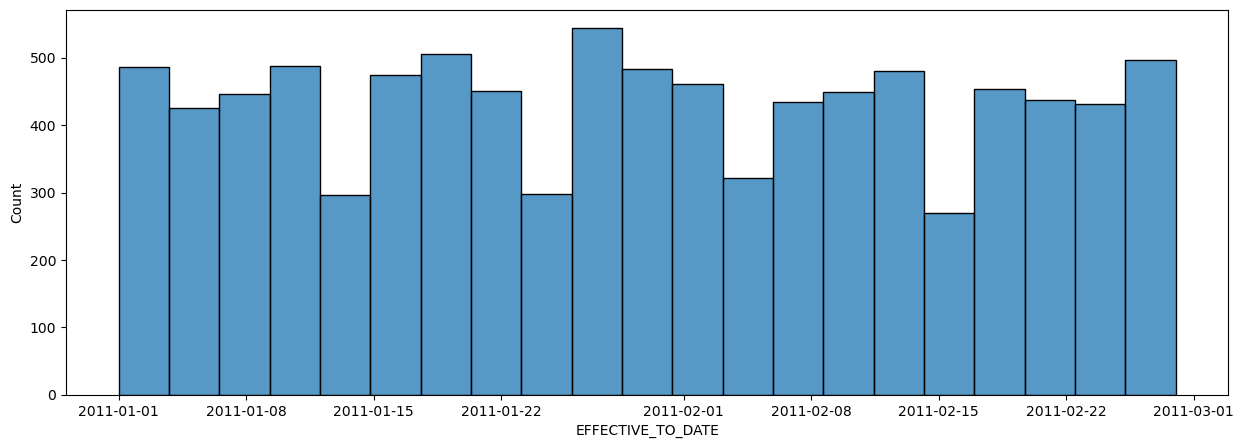

In [21]:
plt.figure(figsize = (15,5))
sns.histplot(x = customer_df1['EFFECTIVE_TO_DATE'], data = customer_df1)

Since EFFECTIVE_TO_DATE is only in JAN and FEB, I could pull it out to 2 categories and see in which month the target value was higher.

### Lab Data Cleaning And Wrangling 

In [22]:
def box_plot(df, column_name): # function to return box plot for a particular column
    plt.figure(figsize=(6, 8))
    sns.boxplot(data=df, y=column_name)
    plt.title(column_name)
    plt.show()

In [23]:
def box_plot_each(df): # function to return box plot for each column of data frame
    for col in df:
        plt.figure(figsize = (6,8))
        plt.title(col)
        sns.boxplot(df[col])
  

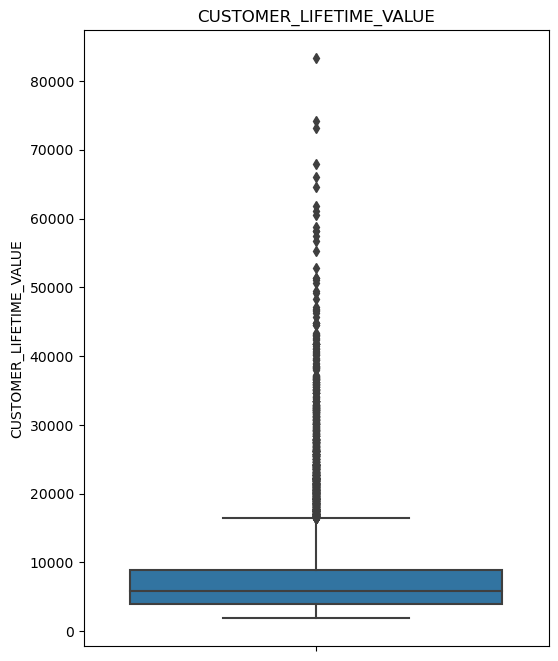

In [24]:
box_plot(customer_df1,'CUSTOMER_LIFETIME_VALUE') 

#### As we can see the outliers start from about 14000, I will split the data so I could analise the outliers separately later if required. (since our initial aim is to achieve hiher customer lifetime value and retention)

In [25]:
customer_df2_outliers = customer_df1[(customer_df1['CUSTOMER_LIFETIME_VALUE'] > 14000)]

In [26]:
customer_df2_outliers.head() # our outliers data

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
8,DY87989,Oregon,24127.50402,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
22,YH23384,Arizona,24127.50402,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
31,UL64533,Nevada,18975.45611,No,Extended,High School or Below,2011-01-22,Employed,M,65999,Urban,Married,237,1,14,0,6,Corporate Auto,Corporate L2,Offer2,Agent,615.927769,Luxury SUV,Medsize
50,WE95729,Oregon,36707.42639,No,Basic,College,2011-01-17,Employed,M,24804,Suburban,Married,104,1,28,0,2,Personal Auto,Personal L2,Offer1,Agent,593.830288,SUV,Small
51,PY51963,California,33473.34946,Yes,Basic,Bachelor,2011-01-11,Employed,F,33190,Suburban,Divorced,106,18,95,0,2,Corporate Auto,Corporate L1,Offer1,Web,508.800000,SUV,Medsize


In [27]:
customer_df2_outliers.shape

(1104, 24)

In [28]:
customer_df2 = customer_df1[(customer_df1['CUSTOMER_LIFETIME_VALUE'] <= 14000)]

In [29]:
customer_df2 = customer_df2.drop(['CUSTOMER'], axis = 1)

In [30]:
customer_df2['CUSTOMER_LIFETIME_VALUE'] = customer_df2['CUSTOMER_LIFETIME_VALUE'].apply(lambda x: round(x,2))

In [31]:
customer_df2.head() # data without outliers in target column

,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
customer_df2.shape

(8030, 23)

In [33]:
customer_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8030 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   STATE                          8030 non-null   object        
 1   CUSTOMER_LIFETIME_VALUE        8030 non-null   float64       
 2   RESPONSE                       8030 non-null   object        
 3   COVERAGE                       8030 non-null   object        
 4   EDUCATION                      8030 non-null   object        
 5   EFFECTIVE_TO_DATE              8030 non-null   datetime64[ns]
 6   EMPLOYMENTSTATUS               8030 non-null   object        
 7   GENDER                         8030 non-null   object        
 8   INCOME                         8030 non-null   int64         
 9   LOCATION_CODE                  8030 non-null   object        
 10  MARITAL_STATUS                 8030 non-null   object        
 11  MONTHLY_PREMIUM_A

In [34]:
customer_df2['NUMBER_OF_OPEN_COMPLAINTS'].value_counts() # since we have everything but 0 as outliers, i want to convert it to categorical value

0    6361
1     878
2     328
3     268
4     142
5      53
Name: NUMBER_OF_OPEN_COMPLAINTS, dtype: int64

### bucketing some columns and changing to categorical

In [35]:
customer_df2['NUMBER_OF_OPEN_COMPLAINTS'] = customer_df2['NUMBER_OF_OPEN_COMPLAINTS'].apply(lambda x: 'zero' if x == 0 else 'one or more')


In [36]:
customer_df2['NUMBER_OF_OPEN_COMPLAINTS'] = customer_df2['NUMBER_OF_OPEN_COMPLAINTS'].astype(str)

In [37]:
customer_df2['NUMBER_OF_OPEN_COMPLAINTS'].value_counts()

zero           6361
one or more    1669
Name: NUMBER_OF_OPEN_COMPLAINTS, dtype: int64

In [38]:
customer_df2['EFFECTIVE_TO_DATE']  # as i remember there was only 2 month of data, will separate 2011-01 and 2011-02

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9128   2011-01-06
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: EFFECTIVE_TO_DATE, Length: 8030, dtype: datetime64[ns]

In [39]:
customer_df2['EFFECTIVE_TO_DATE'] = customer_df2['EFFECTIVE_TO_DATE'].apply(lambda x: x.strftime("%m"))
#FORMATTING to see only month

In [40]:
customer_df2['EFFECTIVE_TO_DATE'] = customer_df2['EFFECTIVE_TO_DATE'].apply(lambda x: 'JAN2011' if str(x).startswith('01') else 'FEB2011')
#FORMATTING SO STR

In [41]:
customer_df2['EFFECTIVE_TO_DATE'].value_counts()

JAN2011    4316
FEB2011    3714
Name: EFFECTIVE_TO_DATE, dtype: int64

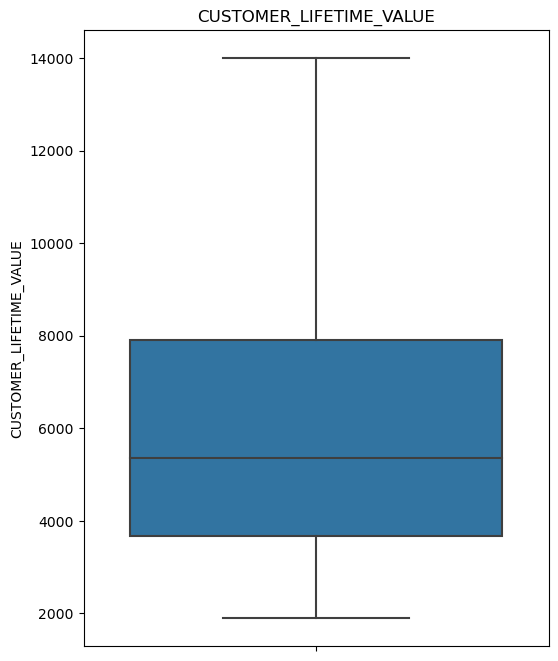

In [42]:
box_plot(customer_df2,'CUSTOMER_LIFETIME_VALUE') 

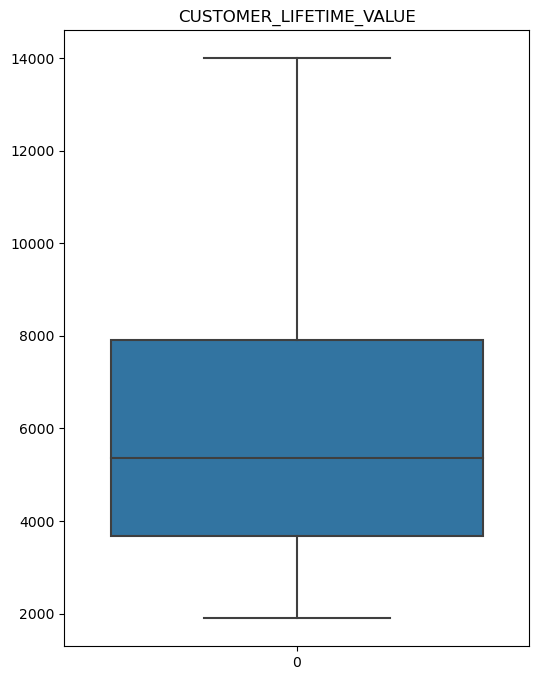

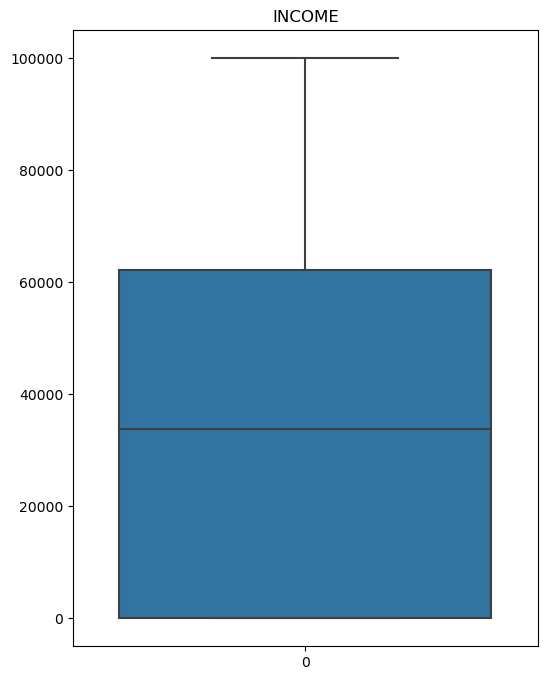

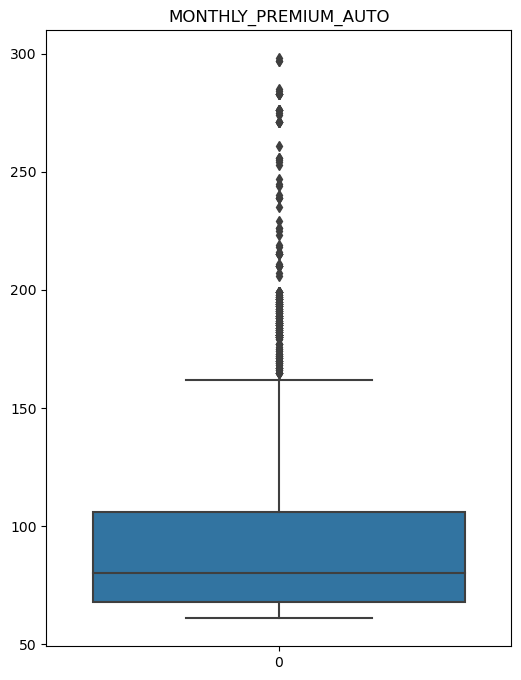

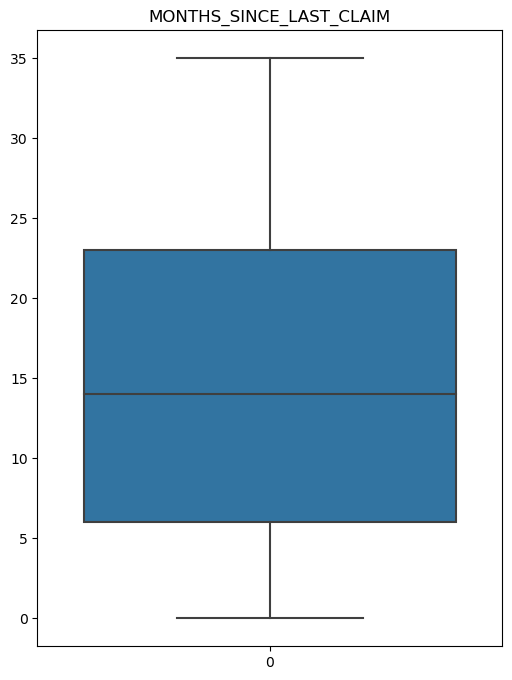

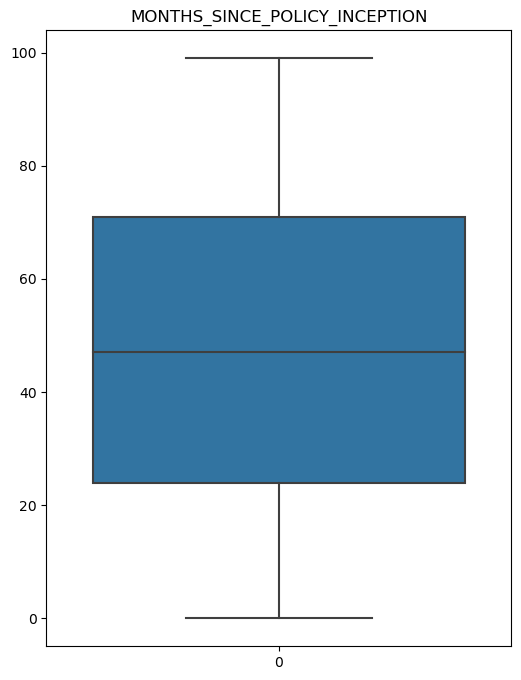

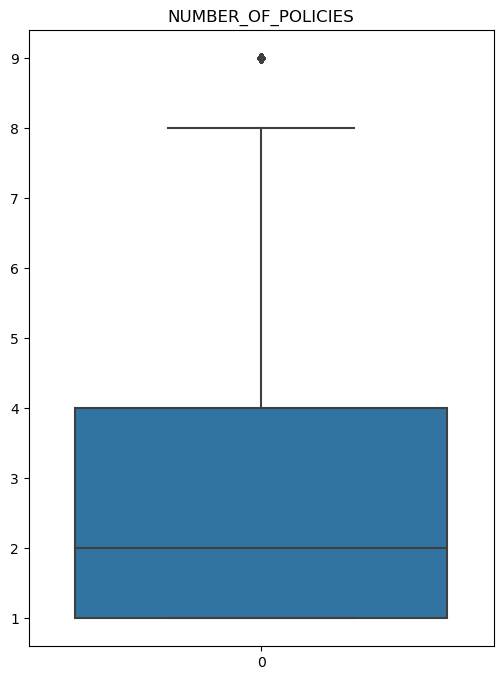

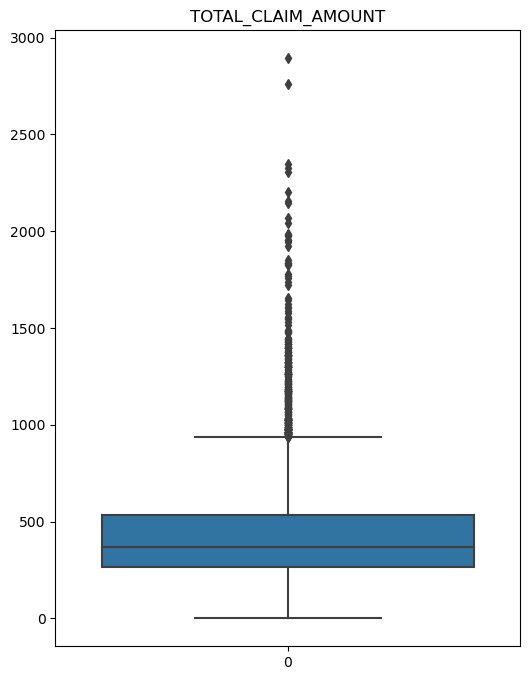

In [43]:
customer_df2_num = customer_df2.select_dtypes("number") # plotted the numerical values to see if there are any outliers left
box_plot_each(customer_df2_num)

#### I have noticed there are still outliers in MONTLY_PREMIUM_AUTO and TOTAL_CLAIM_AMOUNT , I have decided to replace them with mean value

In [44]:
# mean imputation function for a single column
def outliers_mean_imputation(df, column):
    for i in df[column]:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr
        if i > upper_tail or i < lower_tail:
            df[column] = df[column].replace(i, np.mean(df[column]))

In [45]:
outliers_mean_imputation(customer_df2_num,'MONTHLY_PREMIUM_AUTO')

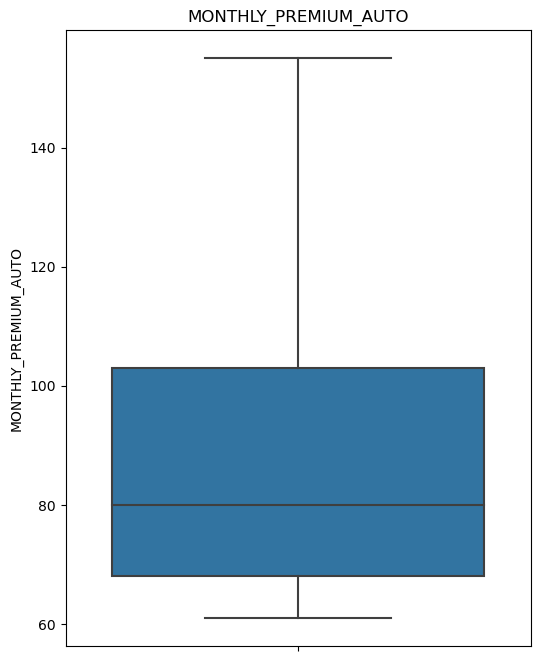

In [46]:
box_plot(customer_df2_num,'MONTHLY_PREMIUM_AUTO') # it WOOOORKED :D 

In [47]:
outliers_mean_imputation(customer_df2_num,'TOTAL_CLAIM_AMOUNT') # doing the same for TOTAL_CLAIM_AMOUNT

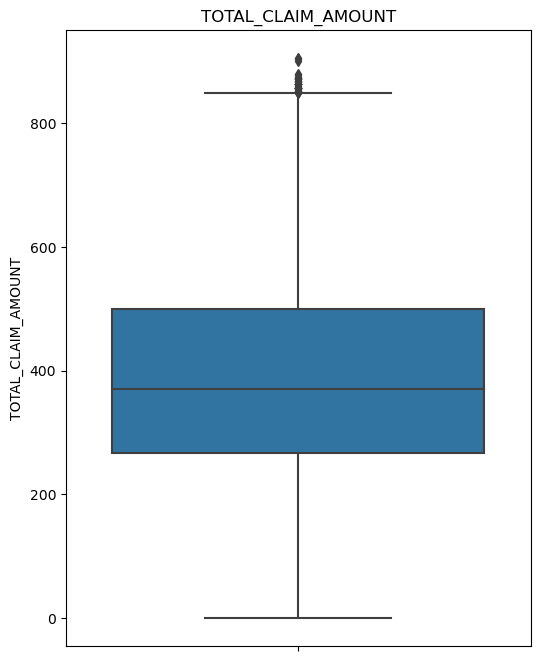

In [48]:
box_plot(customer_df2_num,'TOTAL_CLAIM_AMOUNT') 

### More work on categorical values before encoding

In [49]:
def count_plot(df, column_name): # function to use countplot
    plt.figure(figsize = (10,5))
    sns.countplot(x = column_name, palette = 'pastel', data = df)

In [50]:
customer_df2_cat = customer_df2.select_dtypes("object")

In [51]:
customer_df2_cat.head() # categorical columns

,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,NUMBER_OF_OPEN_COMPLAINTS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,FEB2011,Employed,F,Suburban,Married,zero,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,JAN2011,Unemployed,F,Suburban,Single,zero,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,FEB2011,Employed,F,Suburban,Married,zero,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,JAN2011,Unemployed,M,Suburban,Married,zero,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,FEB2011,Employed,M,Rural,Single,zero,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


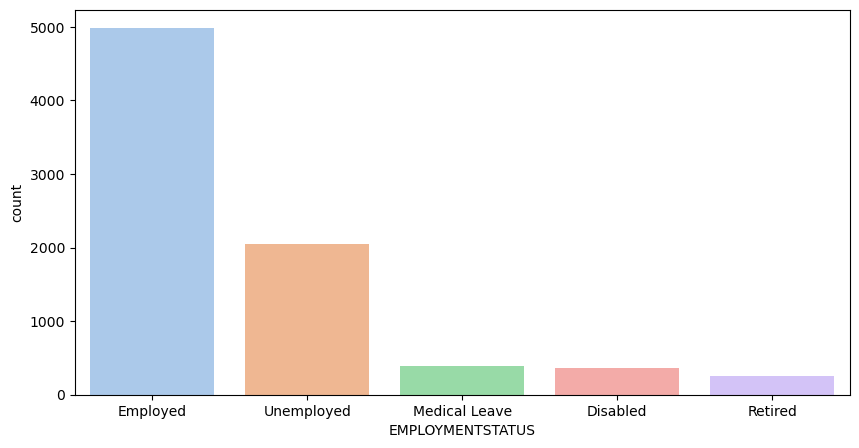

In [52]:
count_plot(customer_df2_cat, 'EMPLOYMENTSTATUS') # below are 3 columns that i wanted to work on

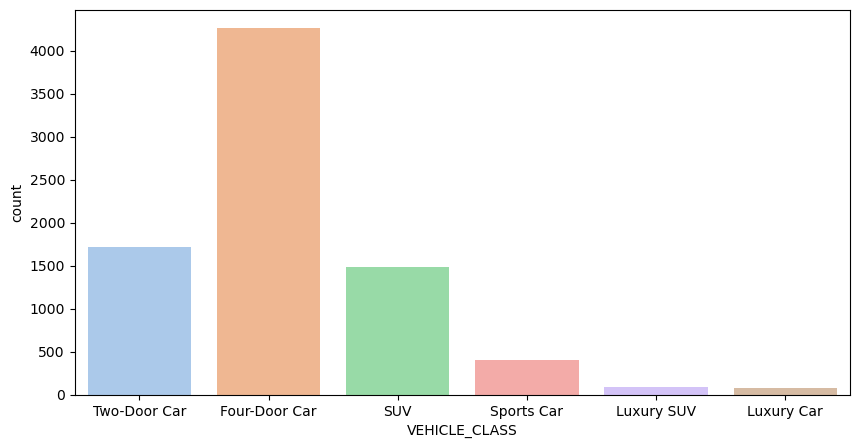

In [53]:
count_plot(customer_df2_cat, 'VEHICLE_CLASS')

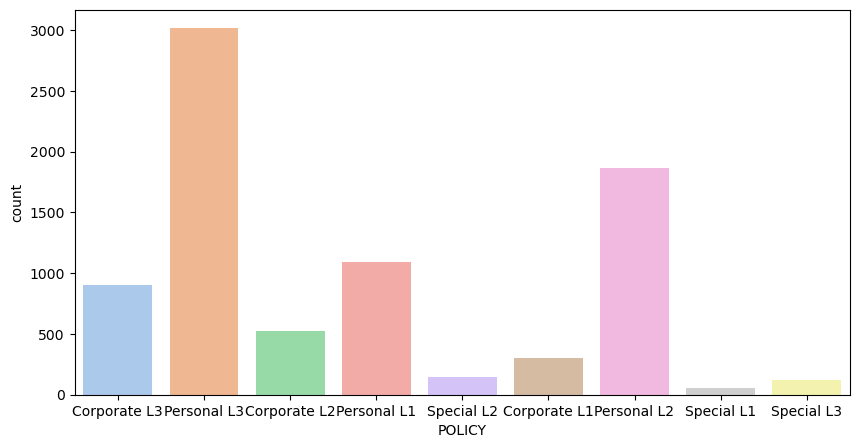

In [54]:
count_plot(customer_df2_cat, 'POLICY')

In [55]:
subsidy_class = ['Medical Leave', 'Disabled','Retired'] #Bucketing

In [56]:
customer_df2_cat['EMPLOYMENTSTATUS'] = customer_df2_cat['EMPLOYMENTSTATUS'].apply(lambda x: 'Subsidy' if x in subsidy_class else x)


In [57]:
customer_df2_cat['EMPLOYMENTSTATUS'].value_counts()

Employed      4984
Unemployed    2048
Subsidy        998
Name: EMPLOYMENTSTATUS, dtype: int64

In [58]:
luxury_cars = ['Sports Car','Luxury Car','Luxury SUV'] #Bucketing

In [59]:
customer_df2_cat['VEHICLE_CLASS'] = customer_df2_cat['VEHICLE_CLASS'].apply(lambda x: 'Luxury Segment Car' if x in luxury_cars else x)


In [60]:
customer_df2_cat['VEHICLE_CLASS'].value_counts()

Four-Door Car         4263
Two-Door Car          1721
SUV                   1484
Luxury Segment Car     562
Name: VEHICLE_CLASS, dtype: int64

In [61]:
customer_df2_cat['POLICY'] = customer_df2_cat['POLICY'].apply(lambda x: 'Corporate' \
                                                              if x.startswith('Corporate') \
                                                              else('Personal' if x.startswith('Personal') else 'Special'))


In [62]:
customer_df2_cat['POLICY'] .value_counts()

Personal     5976
Corporate    1729
Special       325
Name: POLICY, dtype: int64

In [70]:
customer_df2_cat_dummies = pd.get_dummies(customer_df2_cat)


In [73]:
customer_df2_cat

,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,NUMBER_OF_OPEN_COMPLAINTS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,FEB2011,Employed,F,Suburban,Married,zero,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,JAN2011,Unemployed,F,Suburban,Single,zero,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,FEB2011,Employed,F,Suburban,Married,zero,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,JAN2011,Unemployed,M,Suburban,Married,zero,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,FEB2011,Employed,M,Rural,Single,zero,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,JAN2011,Employed,F,Suburban,Single,zero,Personal Auto,Personal,Offer1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,FEB2011,Employed,F,Suburban,Divorced,zero,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,FEB2011,Unemployed,M,Suburban,Single,one or more,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,FEB2011,Employed,M,Suburban,Married,zero,Personal Auto,Personal,Offer3,Branch,Four-Door Car,Large


### Encoding and standartizing, Model building

In [84]:
customer_df2_cat_onehot = customer_df2_cat.drop(['EDUCATION',"COVERAGE","EMPLOYMENTSTATUS","LOCATION_CODE","VEHICLE_SIZE"], axis = 1)

In [89]:
customer_df2_cat_onehot = pd.get_dummies(customer_df2_cat_onehot) 

In [88]:
customer_df2_cat_ordinal = customer_df2_cat.drop(['STATE','RESPONSE', 'EFFECTIVE_TO_DATE','GENDER', 'MARITAL_STATUS', 'NUMBER_OF_OPEN_COMPLAINTS', 'POLICY_TYPE','POLICY','RENEW_OFFER_TYPE','SALES_CHANNEL','VEHICLE_CLASS'], axis=1)

In [90]:
customer_df2_cat_ordinal["EDUCATION"] = customer_df2_cat_ordinal["EDUCATION"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2,"Master" : 3,"Doctor" : 4 })
customer_df2_cat_ordinal["COVERAGE"] = customer_df2_cat_ordinal["COVERAGE"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
customer_df2_cat_ordinal["EMPLOYMENTSTATUS"] = customer_df2_cat_ordinal["EMPLOYMENTSTATUS"].map({"Unemployed" : 0, "Subsidy" : 1, "Employed" : 2})
customer_df2_cat_ordinal["LOCATION_CODE"] = customer_df2_cat_ordinal["LOCATION_CODE"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
customer_df2_cat_ordinal["VEHICLE_SIZE"] = customer_df2_cat_ordinal["VEHICLE_SIZE"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [91]:
customer_df2_cat_encoded = pd.concat([customer_df2_cat_ordinal,customer_df2_cat_onehot], axis = 1)

In [92]:
df_final = pd.concat([customer_df2_num, customer_df2_cat_encoded], axis = 1)

In [94]:
df_final.head()

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,LOCATION_CODE,VEHICLE_SIZE,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RESPONSE_No,RESPONSE_Yes,EFFECTIVE_TO_DATE_FEB2011,EFFECTIVE_TO_DATE_JAN2011,GENDER_F,GENDER_M,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Single,NUMBER_OF_OPEN_COMPLAINTS_one or more,NUMBER_OF_OPEN_COMPLAINTS_zero,POLICY_TYPE_Corporate Auto,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,POLICY_Corporate,POLICY_Personal,POLICY_Special,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Four-Door Car,VEHICLE_CLASS_Luxury Segment Car,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Two-Door Car
0,2763.52,56274,69.0,32,5,1,384.811147,0,2,2,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,6979.54,0,94.0,13,42,8,417.492545,1,2,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,12887.43,48767,108.0,18,38,2,566.472247,2,2,2,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
3,7645.86,0,106.0,18,65,7,529.881344,0,2,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,2813.69,43836,73.0,12,44,1,138.130879,0,2,2,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0


In [96]:
df_final.shape

(8030, 46)

#### Separating into features variables and target variable

In [97]:
X = df_final.drop('CUSTOMER_LIFETIME_VALUE', axis = 1)

In [98]:
Y = df_final['CUSTOMER_LIFETIME_VALUE']